**Student Name :** Ait Belkacem Elisa                                                                                        
**Course :** Natural Language Processing   
**Academic year :** 2025-2026  

<h1 style="text-align:center;">ASSIGNMENT 1</h1>

# Step 1 : Cleanning 

In [1]:
import pandas as pd
import re
import spacy


nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("fr_core_news_sm")


In [2]:
path = r"C:\Users\elisa\Downloads\Paires de phrases en anglais-français - 2026-02-12.tsv"
df = pd.read_csv(path, sep="\t", encoding="utf-8")
df.head()

,1276,Let's try something.,3091,Essayons quelque chose !
0,1276,Let's try something.,456963,Tentons quelque chose !
1,1277,I have to go to sleep.,373908,Je dois aller dormir.
2,1280,Today is June 18th and it is Muiriel's birthday!,3095,Aujourd'hui nous sommes le 18 juin et c'est l'...
3,1280,Today is June 18th and it is Muiriel's birthday!,696081,"Aujourd'hui c'est le 18 juin, et c'est l'anniv..."
4,1282,Muiriel is 20 now.,3097,Muiriel a 20 ans maintenant.


In [3]:
df = df.iloc[:10000].copy()

In [4]:
df.columns

Index(['1276', 'Let's try something.', '3091', 'Essayons quelque chose !'], dtype='object')

In [5]:

df = df.iloc[:, [1, 3]]
df.head()


,Let's try something.,Essayons quelque chose !
0,Let's try something.,Tentons quelque chose !
1,I have to go to sleep.,Je dois aller dormir.
2,Today is June 18th and it is Muiriel's birthday!,Aujourd'hui nous sommes le 18 juin et c'est l'...
3,Today is June 18th and it is Muiriel's birthday!,"Aujourd'hui c'est le 18 juin, et c'est l'anniv..."
4,Muiriel is 20 now.,Muiriel a 20 ans maintenant.


In [6]:
df = df.rename(columns={df.columns[0]: "en",
                        df.columns[1]: "fr"})
df.head()


,en,fr
0,Let's try something.,Tentons quelque chose !
1,I have to go to sleep.,Je dois aller dormir.
2,Today is June 18th and it is Muiriel's birthday!,Aujourd'hui nous sommes le 18 juin et c'est l'...
3,Today is June 18th and it is Muiriel's birthday!,"Aujourd'hui c'est le 18 juin, et c'est l'anniv..."
4,Muiriel is 20 now.,Muiriel a 20 ans maintenant.


### A generic text cleaning function.


1.Convert to lowercase

2.Remove numbers and punctuation

3.Keep only letters and spaces

4.Remove multiple spaces 

In [7]:
def clean_text(text: str) -> str:
    if pd.isna(text):
        return ""
    text = text.lower()
    # garder lettres (a-z, accents) + espace
    text = re.sub(r"[^a-zA-ZÀ-ÖØ-öø-ÿ\s]", " ", text)
    # compresser les espaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [8]:
df["en_clean"] = df["en"].apply(clean_text)
df["fr_clean"] = df["fr"].apply(clean_text)
df[["en", "en_clean", "fr", "fr_clean"]].head()


,en,en_clean,fr,fr_clean
0,Let's try something.,let s try something,Tentons quelque chose !,tentons quelque chose
1,I have to go to sleep.,i have to go to sleep,Je dois aller dormir.,je dois aller dormir
2,Today is June 18th and it is Muiriel's birthday!,today is june th and it is muiriel s birthday,Aujourd'hui nous sommes le 18 juin et c'est l'...,aujourd hui nous sommes le juin et c est l ann...
3,Today is June 18th and it is Muiriel's birthday!,today is june th and it is muiriel s birthday,"Aujourd'hui c'est le 18 juin, et c'est l'anniv...",aujourd hui c est le juin et c est l anniversa...
4,Muiriel is 20 now.,muiriel is now,Muiriel a 20 ans maintenant.,muiriel a ans maintenant


### Tokenisation

In [9]:
def tokenize_en(text: str):
    doc = nlp_en(text)
    # enlever ponctuation et espaces vides
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    return tokens

def tokenize_fr(text: str):
    doc = nlp_fr(text)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    return tokens


In [10]:
df["en_tokens"] = df["en_clean"].apply(tokenize_en)
df["fr_tokens"] = df["fr_clean"].apply(tokenize_fr)
df[["en_clean", "en_tokens", "fr_clean", "fr_tokens"]].head()


,en_clean,en_tokens,fr_clean,fr_tokens
0,let s try something,"[let, s, try, something]",tentons quelque chose,"[tentons, quelque, chose]"
1,i have to go to sleep,"[i, have, to, go, to, sleep]",je dois aller dormir,"[je, dois, aller, dormir]"
2,today is june th and it is muiriel s birthday,"[today, is, june, th, and, it, is, muiriel, s,...",aujourd hui nous sommes le juin et c est l ann...,"[aujourd, hui, nous, sommes, le, juin, et, c, ..."
3,today is june th and it is muiriel s birthday,"[today, is, june, th, and, it, is, muiriel, s,...",aujourd hui c est le juin et c est l anniversa...,"[aujourd, hui, c, est, le, juin, et, c, est, l..."
4,muiriel is now,"[muiriel, is, now]",muiriel a ans maintenant,"[muiriel, a, ans, maintenant]"


### remove stop words

In [11]:
def tokenize_en_no_stop(text: str):
    doc = nlp_en(text)
    tokens = [
        token.text
        for token in doc
        if not token.is_punct and not token.is_space and not token.is_stop
    ]
    return tokens

def tokenize_fr_no_stop(text: str):
    doc = nlp_fr(text)
    tokens = [
        token.text
        for token in doc
        if not token.is_punct and not token.is_space and not token.is_stop
    ]
    return tokens


In [12]:
df["en_tokens_ns"] = df["en_clean"].apply(tokenize_en_no_stop)
df["fr_tokens_ns"] = df["fr_clean"].apply(tokenize_fr_no_stop)

In [13]:
df[["en_clean", "en_tokens", "fr_clean", "fr_tokens", "en_tokens_ns","fr_tokens_ns"]].head()

,en_clean,en_tokens,fr_clean,fr_tokens,en_tokens_ns,fr_tokens_ns
0,let s try something,"[let, s, try, something]",tentons quelque chose,"[tentons, quelque, chose]","[let, s, try]","[tentons, chose]"
1,i have to go to sleep,"[i, have, to, go, to, sleep]",je dois aller dormir,"[je, dois, aller, dormir]",[sleep],"[dois, aller, dormir]"
2,today is june th and it is muiriel s birthday,"[today, is, june, th, and, it, is, muiriel, s,...",aujourd hui nous sommes le juin et c est l ann...,"[aujourd, hui, nous, sommes, le, juin, et, c, ...","[today, june, th, muiriel, s, birthday]","[aujourd, sommes, juin, c, l, anniversaire, mu..."
3,today is june th and it is muiriel s birthday,"[today, is, june, th, and, it, is, muiriel, s,...",aujourd hui c est le juin et c est l anniversa...,"[aujourd, hui, c, est, le, juin, et, c, est, l...","[today, june, th, muiriel, s, birthday]","[aujourd, c, juin, c, l, anniversaire, muiriel]"
4,muiriel is now,"[muiriel, is, now]",muiriel a ans maintenant,"[muiriel, a, ans, maintenant]",[muiriel],"[muiriel, ans]"


# Step 2 : Embeddings

### 1. One‑hot encoding

In [15]:
from collections import Counter
import numpy as np

def build_vocab(token_lists, min_freq=1):
    """
    Build a word -> index mapping from tokenized sentences.
    Indices go from 0 to V-1 without gaps.
    """
    counter = Counter()
    for tokens in token_lists:
        counter.update(tokens)

    # Keep only words with frequency >= min_freq
    words = [w for w, c in counter.items() if c >= min_freq]

    # Assign indices from 0 to len(words)-1
    vocab = {w: i for i, w in enumerate(words)}
    return vocab

en_vocab = build_vocab(df["en_tokens"], min_freq=2)
fr_vocab = build_vocab(df["fr_tokens"], min_freq=2)

print("English vocab size:", len(en_vocab))
print("French vocab size:", len(fr_vocab))


English vocab size: 3106
French vocab size: 3846


In [16]:
def one_hot_word(word, vocab):
    """
    One-hot vector for a single word.
    """
    V = len(vocab)
    vec = np.zeros(V, dtype=np.float32)
    if word in vocab:
        idx = vocab[word]
        if 0 <= idx < V:
            vec[idx] = 1.0
    return vec

def one_hot_sentence(tokens, vocab):
    """
    Binary bag-of-words one-hot vector for a sentence.
    """
    V = len(vocab)
    vec = np.zeros(V, dtype=np.float32)
    for w in tokens:
        if w in vocab:
            idx = vocab[w]
            if 0 <= idx < V:
                vec[idx] = 1.0
    return vec


In [17]:
en_one_hot = np.vstack([one_hot_sentence(tokens, en_vocab) 
                        for tokens in df["en_tokens"]])
fr_one_hot = np.vstack([one_hot_sentence(tokens, fr_vocab) 
                        for tokens in df["fr_tokens"]])

print(en_one_hot.shape, fr_one_hot.shape)


(10000, 3106) (10000, 3846)


### 2. TF‑IDF vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


en_texts = [" ".join(tokens) for tokens in df["en_tokens"]]
fr_texts = [" ".join(tokens) for tokens in df["fr_tokens"]]


en_tfidf_vectorizer = TfidfVectorizer(
    lowercase=False,       # already lowercased
    min_df=2,              # ignore very rare terms
    max_df=0.95,           # ignore extremely frequent terms
    ngram_range=(1, 1)     # unigrams only (can try bigrams later)
)
fr_tfidf_vectorizer = TfidfVectorizer(
    lowercase=False,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 1)
)


X_en_tfidf = en_tfidf_vectorizer.fit_transform(en_texts)
X_fr_tfidf = fr_tfidf_vectorizer.fit_transform(fr_texts)

print("English TF-IDF shape:", X_en_tfidf.shape)
print("French TF-IDF shape: ", X_fr_tfidf.shape)


def show_top_tfidf_features(vectorizer, X, doc_id, top_k=10):
    """
    Print the top-k TF-IDF features for a given document.
    """
    feature_names = np.array(vectorizer.get_feature_names_out())
    row = X[doc_id].toarray().ravel()
    top_indices = row.argsort()[::-1][:top_k]
    for idx in top_indices:
        print(feature_names[idx], row[idx])

print("Top TF-IDF terms for English sentence 0:")
show_top_tfidf_features(en_tfidf_vectorizer, X_en_tfidf, 0)


English TF-IDF shape: (10000, 3083)
French TF-IDF shape:  (10000, 3814)
Top TF-IDF terms for English sentence 0:
try 0.6569476375908199
something 0.5396042680332765
let 0.5265425295112566
writing 0.0
accept 0.0
accepted 0.0
yokohama 0.0
abandon 0.0
zero 0.0
youth 0.0


In [20]:
import pandas as pd
import numpy as np


en_features = np.array(en_tfidf_vectorizer.get_feature_names_out())


X_en_sample = X_en_tfidf[:5].toarray()


df_en_tfidf_sample = pd.DataFrame(X_en_sample, columns=en_features)


df_en_tfidf_sample.head()


,abandon,abandoned,ability,able,abolish,about,above,abroad,absence,absent,...,yoshida,you,young,younger,your,yours,yourself,yourselves,youth,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Word2Vec

In [21]:
from gensim.models import Word2Vec


en_sentences = df["en_tokens"].tolist()
fr_sentences = df["fr_tokens"].tolist()

en_w2v = Word2Vec(
    sentences=en_sentences,
    vector_size=100,   # embedding dimensionality
    window=5,          # context window size
    min_count=3,       # ignore very rare words
    sg=1,              # 1 = skip-gram, 0 = CBOW
    workers=4,
    epochs=10
)

fr_w2v = Word2Vec(
    sentences=fr_sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=1,
    workers=4,
    epochs=10
)

print("Vector for 'today' in English:")
print(en_w2v.wv["today"])




Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Vector for 'today' in English:
[-0.14259917  0.2372975   0.09461704 -0.0904711   0.04480368 -0.01081641
  0.07252447  0.37263486 -0.22415239 -0.11640324 -0.0443936   0.00937647
  0.08625796  0.07559296  0.18035111 -0.20427735  0.02817341 -0.37357444
 -0.2331033  -0.32069203  0.10558024 -0.00751004  0.1737986   0.03996319
 -0.08196037 -0.05489406 -0.08188789 -0.12410954  0.0028205   0.06339604
 -0.00745025 -0.1468701  -0.07697409 -0.23996854 -0.22337806  0.27737746
 -0.13187985 -0.21783462 -0.07227665 -0.11438508  0.13171789 -0.12691319
  0.03333168 -0.02790775  0.1629766  -0.09766845 -0.05111074 -0.04551652
  0.0855626   0.11113645  0.07607991 -0.1045093  -0.2665888  -0.01845592
 -0.07600561 -0.10347754  0.16916624  0.08108287 -0.06334242 -0.18315206
 -0.04802591  0.00531242  0.05440606  0.04405193 -0.10905378  0.2728739
  0.21917027  0.12939811 -0.32471973  0.19010794  0.08667856  0.34929696
  0.08439468  0.00068341  0.20137307 -0.02331177  0.04877225  0.19786946
 -0.1371171   0.03477

In [22]:

def sentence_embedding_w2v(tokens, model):
    """
    Compute the average Word2Vec embedding for a sentence.
    Ignores words not present in the model vocabulary.
    """
    vecs = []
    for w in tokens:
        if w in model.wv:
            vecs.append(model.wv[w])
    if len(vecs) == 0:
        # if no word is known, return a zero vector
        return np.zeros(model.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)


In [23]:

en_w2v_sent = np.vstack([sentence_embedding_w2v(tokens, en_w2v) for tokens in en_sentences])
fr_w2v_sent = np.vstack([sentence_embedding_w2v(tokens, fr_w2v) for tokens in fr_sentences])

print("English Word2Vec sentence matrix:", en_w2v_sent.shape)


English Word2Vec sentence matrix: (10000, 100)


(200, 100)
(200, 2)


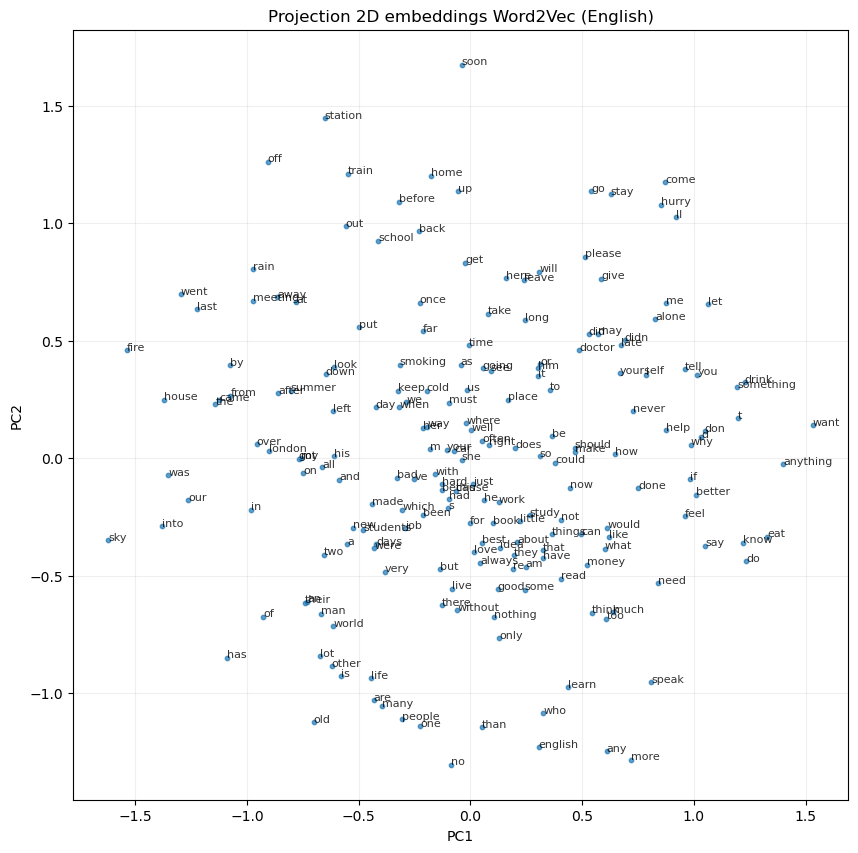

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


N = 200
words = list(en_w2v.wv.key_to_index.keys())[:N]


vectors = np.vstack([en_w2v.wv[w] for w in words])
print(vectors.shape)
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)
print(vectors_2d.shape)  # (N, 2)
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=10, alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8, alpha=0.8)

plt.title("Projection 2D embeddings Word2Vec (English)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.2)
plt.show()


In [28]:


en_counter = Counter([w for sent in df["en_tokens_ns"] for w in sent])
fr_counter = Counter([w for sent in df["fr_tokens_ns"] for w in sent])


def get_top_words(counter, w2v_model, top_k=100):
    words = []
    for w, _ in counter.most_common():
        if w in w2v_model.wv:
            words.append(w)
        if len(words) >= top_k:
            break
    return words

en_words = get_top_words(en_counter, en_w2v, top_k=100)
fr_words = get_top_words(fr_counter, fr_w2v, top_k=100)

print("Nb English words:", len(en_words))
print("Nb French words:", len(fr_words))

import numpy as np
from sklearn.decomposition import PCA


X_en = np.vstack([en_w2v.wv[w] for w in en_words])   # (N_en, dim)

X_fr = np.vstack([fr_w2v.wv[w] for w in fr_words])   # (N_fr, dim)


X_all = np.vstack([X_en, X_fr])                      # (N_en + N_fr, dim)


pca = PCA(n_components=2)
X_all_2d = pca.fit_transform(X_all)                  # (N_en + N_fr, 2)


X_en_2d = X_all_2d[:len(en_words)]
X_fr_2d = X_all_2d[len(en_words):]



Nb English words: 100
Nb French words: 100


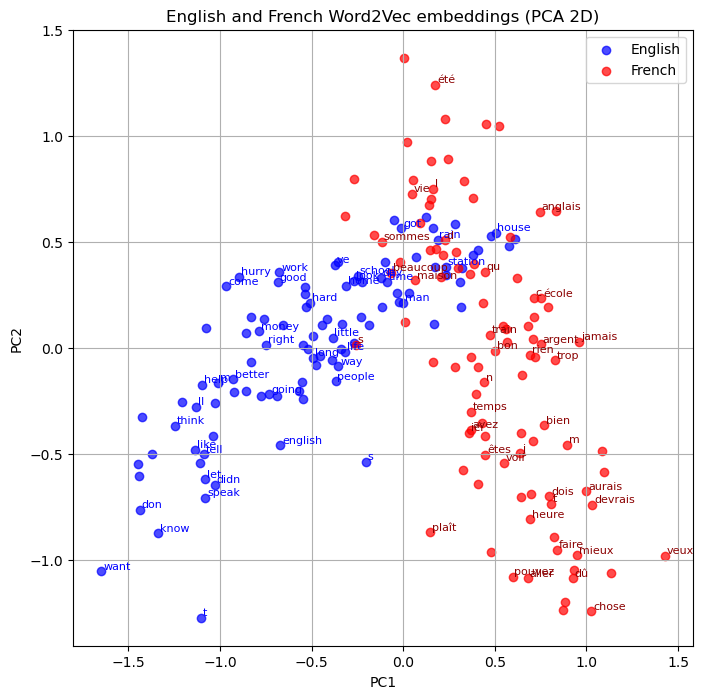

In [29]:
plt.figure(figsize=(8, 8))


plt.scatter(X_en_2d[:, 0], X_en_2d[:, 1], c="blue", alpha=0.7, label="English")


plt.scatter(X_fr_2d[:, 0], X_fr_2d[:, 1], c="red", alpha=0.7, label="French")


for i, w in enumerate(en_words[:40]):  # annotate first 40 English words
    x, y = X_en_2d[i, 0], X_en_2d[i, 1]
    plt.text(x + 0.01, y + 0.01, w, fontsize=8, color="blue")

for i, w in enumerate(fr_words[:40]):  # annotate first 40 French words
    x, y = X_fr_2d[i, 0], X_fr_2d[i, 1]
    plt.text(x + 0.01, y + 0.01, w, fontsize=8, color="darkred")

plt.title("English and French Word2Vec embeddings (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


### 4. GloVe embeddings

In [33]:
import os

def load_glove_embeddings(glove_path, vocab_limit=None):
    """
    Load GloVe embeddings from a text file.
    Returns a dict: word -> vector (numpy array).
    Optionally limit the number of words loaded (vocab_limit).
    """
    embeddings = {}
    with open(glove_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if vocab_limit is not None and i >= vocab_limit:
                break
            parts = line.strip().split()
            if len(parts) < 10:
                # skip invalid lines
                continue
            word = parts[0]
            vec = np.asarray(parts[1:], dtype=np.float32)
            embeddings[word] = vec
    print(f"Loaded {len(embeddings)} GloVe vectors from {glove_path}")
    return embeddings


import os

glove_en_path = r"C:\Users\elisa\Downloads\glove.6B\glove.6B.100d.txt"

glove_en = load_glove_embeddings(glove_en_path, vocab_limit=400000)


Loaded 400000 GloVe vectors from C:\Users\elisa\Downloads\glove.6B\glove.6B.100d.txt


In [34]:
def sentence_embedding_glove(tokens, glove_dict, dim=100):
    """
    Compute the average GloVe embedding for a sentence.
    Words not found in the dictionary are ignored.
    """
    vecs = []
    for w in tokens:
        if w in glove_dict:
            vecs.append(glove_dict[w])
    if len(vecs) == 0:
        return np.zeros(dim, dtype=np.float32)
    return np.mean(vecs, axis=0)


en_glove_sent = np.vstack([
    sentence_embedding_glove(tokens, glove_en, dim=100) 
    for tokens in df["en_tokens"]
])

print("English GloVe sentence matrix:", en_glove_sent.shape)


English GloVe sentence matrix: (10000, 100)


### 5. FastText embeddings

In [47]:
from gensim.models import FastText
sentences_en = df["en_tokens_ns"].tolist()
sentences_fr = df["fr_tokens_ns"].tolist()

print("Nb phrases EN :", len(sentences_en))
print("Nb phrases FR :", len(sentences_fr))

VECTOR_SIZE = 100
WINDOW = 5
MIN_COUNT = 5
WORKERS = 4


ft_en = FastText(
    sentences=sentences_en,
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS,
    sg=0  # 0 = CBOW, 1 = Skip-gram
)


ft_fr = FastText(
    sentences=sentences_fr,
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS,
    sg=0
)

print("Taille vocab FT EN :", len(ft_en.wv))
print("Taille vocab FT FR :", len(ft_fr.wv))
print("Dim vecteurs :", ft_en.vector_size)


Nb phrases EN : 10000
Nb phrases FR : 10000
Taille vocab FT EN : 1265
Taille vocab FT FR : 1383
Dim vecteurs : 100


In [48]:

print(ft_en.wv["today"])


import numpy as np

def sentence_embedding_fasttext(tokens, model):
    vecs = []
    for w in tokens:
        if w in model.wv:          # en pratique, FastText sait gérer OOV via sous-mots
            vecs.append(model.wv[w])
    if not vecs:
        return np.zeros(model.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

en_ft_sent = np.vstack([
    sentence_embedding_fasttext(tokens, ft_en)
    for tokens in df["en_tokens"]
])
fr_ft_sent = np.vstack([
    sentence_embedding_fasttext(tokens, ft_fr)
    for tokens in df["fr_tokens"]
])

print(en_ft_sent.shape, fr_ft_sent.shape)


[-0.25117952  0.11142575 -0.0511179   0.01929201  0.03179104  0.11351505
  0.0190239   0.14843611  0.11803064 -0.1744177   0.26680887 -0.08376449
 -0.39080516  0.48687026  0.11743034 -0.04069906 -0.00866704  0.0308132
 -0.27577287 -0.38863742 -0.22606887 -0.01831392 -0.01784149 -0.1807253
 -0.00593289 -0.05710033 -0.20461501 -0.07184865  0.39787605  0.17301543
  0.05224692  0.05263277  0.2689614   0.11507991 -0.00173768  0.1965469
  0.13483454  0.46237203 -0.16214386  0.24109411 -0.07492771 -0.3549727
  0.22745222 -0.31524366 -0.2356161  -0.24079111 -0.21310768 -0.12063575
  0.06775861  0.12994272  0.07167817  0.03826098  0.24784632  0.16078548
 -0.02401524 -0.0061099   0.06703778 -0.08263011 -0.07045092 -0.02509868
  0.3051138  -0.01508019 -0.17785385  0.49706784 -0.03484643  0.29622307
  0.04949106 -0.04447908  0.03587518  0.26949996  0.00783845  0.03534716
  0.07856467 -0.25518486  0.01897798  0.04461705  0.27672416 -0.12491591
 -0.09462894  0.07679066 -0.03107012 -0.19578223 -0.123

# Step 03 : Multilingual Alignment

## Using the pre-cleaned dataset

In [46]:
from collections import Counter
import random


en_counter = Counter([w for sent in df["en_tokens_ns"] for w in sent])
fr_counter = Counter([w for sent in df["fr_tokens_ns"] for w in sent])


def filter_vocab(counter, w2v_model, min_freq=5):
    words = []
    for w, c in counter.items():
        if c >= min_freq and w in w2v_model.wv:
            words.append(w)
    return words

en_candidates = filter_vocab(en_counter, en_w2v, min_freq=5)
fr_candidates = filter_vocab(fr_counter, fr_w2v, min_freq=5)

print("English candidate words:", len(en_candidates))
print("French candidate words:", len(fr_candidates))


English candidate words: 1265
French candidate words: 1383


In [49]:
bilingual_pairs = set()

for en_tokens, fr_tokens in zip(df["en_tokens"], df["fr_tokens"]):
    L = min(len(en_tokens), len(fr_tokens))
    for i in range(L):
        en_w = en_tokens[i]
        fr_w = fr_tokens[i]
        if (en_w in en_candidates) and (fr_w in fr_candidates):
            bilingual_pairs.add((en_w, fr_w))

print("Number of raw bilingual pairs:", len(bilingual_pairs))


bilingual_pairs = list(bilingual_pairs)
random.shuffle(bilingual_pairs)


bilingual_pairs[:20]


Number of raw bilingual pairs: 4430


[('s', 'côté'),
 ('company', 'l'),
 ('drop', 'puisses'),
 ('like', 'boire'),
 ('look', 'avez'),
 ('friday', 'prochain'),
 ('france', 'exemple'),
 ('expecting', 'vraiment'),
 ('popular', 'an'),
 ('hospital', 'urgence'),
 ('game', 'match'),
 ('tom', 'temps'),
 ('want', 'faire'),
 ('pencil', 's'),
 ('turn', 'augmente'),
 ('family', 'famille'),
 ('world', 'ici'),
 ('sent', 'appelé'),
 ('ask', 'difficulté'),
 ('past', 'passé')]

In [50]:


max_pairs = 5000  
pairs_used = bilingual_pairs[:max_pairs]


d = en_w2v.vector_size  # embedding dimension

X = []
Y = []

for en_w, fr_w in pairs_used:
    if (en_w in en_w2v.wv) and (fr_w in fr_w2v.wv):
        X.append(en_w2v.wv[en_w])
        Y.append(fr_w2v.wv[fr_w])

X = np.vstack(X)  # shape (n, d)
Y = np.vstack(Y)  # shape (n, d)

print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (4430, 100)
Y shape: (4430, 100)


In [51]:
from numpy.linalg import svd



Xc = X
Yc = Y


M = Xc.T @ Yc  # shape (d, d)


U, S, Vt = svd(M)


W = U @ Vt  # shape (d, d)

print("W shape:", W.shape)


W shape: (100, 100)


In [52]:
from numpy.linalg import norm

def align_en_vector(en_vec, W):
    """
    Map an English vector into the French embedding space.
    """
    return en_vec @ W  # shape (d,)

def cosine_similarity(a, b):
    """
    Cosine similarity between two vectors.
    """
    if norm(a) == 0 or norm(b) == 0:
        return 0.0
    return float(a @ b / (norm(a) * norm(b)))


en_word = "today"
fr_word = "aujourd" 

if (en_word in en_w2v.wv) and (fr_word in fr_w2v.wv):
    en_vec = en_w2v.wv[en_word]
    en_vec_aligned = align_en_vector(en_vec, W)
    fr_vec = fr_w2v.wv[fr_word]
    print("Cosine similarity after alignment:", cosine_similarity(en_vec_aligned, fr_vec))


Cosine similarity after alignment: 0.6596196889877319


In [53]:
from sklearn.model_selection import train_test_split


train_pairs, test_pairs = train_test_split(
    bilingual_pairs, test_size=0.2, random_state=42
)


def build_matrices(pairs, en_model, fr_model):
    X_list, Y_list = [], []
    for en_w, fr_w in pairs:
        if en_w in en_model.wv and fr_w in fr_model.wv:
            X_list.append(en_model.wv[en_w])
            Y_list.append(fr_model.wv[fr_w])
    return np.vstack(X_list), np.vstack(Y_list)

X_train, Y_train = build_matrices(train_pairs, en_w2v, fr_w2v)
print("Train shapes:", X_train.shape, Y_train.shape)


M_train = X_train.T @ Y_train
U, S, Vt = svd(M_train)
W_train = U @ Vt


X_test, Y_test = build_matrices(test_pairs, en_w2v, fr_w2v)
X_test_aligned = X_test @ W_train

cos_sims = []
for i in range(X_test.shape[0]):
    cos_sims.append(cosine_similarity(X_test_aligned[i], Y_test[i]))

mean_cos = float(np.mean(cos_sims))
print("Mean cosine similarity on test pairs:", mean_cos)


Train shapes: (3544, 100) (3544, 100)
Mean cosine similarity on test pairs: 0.7041251724775098


## Using the MUSE en–fr dictionary

In [55]:
import os

def load_muse_dictionary(path, max_pairs=None):
    """
    Load a MUSE bilingual dictionary from a text file: 'en_word fr_word' per line.
    Returns a list of (en_word, fr_word).
    """
    pairs = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 2:
                continue
            en_w, fr_w = parts[0], parts[1]
            pairs.append((en_w, fr_w))
            if max_pairs is not None and len(pairs) >= max_pairs:
                break
    return pairs

train_dict_path = r"C:\Users\elisa\Downloads\en-fr.0-5000.txt"
test_dict_path  = r"C:\Users\elisa\Downloads\en-fr.5000-6500.txt"

muse_train_pairs = load_muse_dictionary(train_dict_path, max_pairs=5000)
muse_test_pairs  = load_muse_dictionary(test_dict_path, max_pairs=1500)

print("MUSE train pairs:", len(muse_train_pairs))
print("MUSE test pairs:", len(muse_test_pairs))
print(muse_train_pairs[:10])


MUSE train pairs: 5000
MUSE test pairs: 1500
[('the', 'le'), ('the', 'les'), ('the', 'la'), ('and', 'et'), ('was', 'fut'), ('was', 'etait'), ('was', 'était'), ('for', 'pour'), ('that', 'que'), ('that', 'cela')]


In [56]:
import numpy as np
from numpy.linalg import svd

def build_xy_from_pairs(pairs, en_model, fr_model):
    """
    Build X (English) and Y (French) matrices from bilingual pairs
    using the given embedding models.
    """
    X_list, Y_list = [], []
    for en_w, fr_w in pairs:
        if en_w in en_model.wv and fr_w in fr_model.wv:
            X_list.append(en_model.wv[en_w])
            Y_list.append(fr_model.wv[fr_w])
    if not X_list:
        raise ValueError("No overlapping words between dictionary and vocab.")
    X = np.vstack(X_list)
    Y = np.vstack(Y_list)
    return X, Y


X_train, Y_train = build_xy_from_pairs(muse_train_pairs, en_w2v, fr_w2v)
print("Train shapes:", X_train.shape, Y_train.shape)

# Procrustes alignment
M = X_train.T @ Y_train
U, S, Vt = svd(M)
W = U @ Vt
print("W shape:", W.shape)


Train shapes: (1288, 100) (1288, 100)
W shape: (100, 100)


In [57]:
from numpy.linalg import norm

def align_en_vector(en_vec, W):
    return en_vec @ W

def cosine_similarity(a, b):
    if norm(a) == 0 or norm(b) == 0:
        return 0.0
    return float(a @ b / (norm(a) * norm(b)))


X_test, Y_test = build_xy_from_pairs(muse_test_pairs, en_w2v, fr_w2v)
X_test_aligned = X_test @ W

cos_sims = [cosine_similarity(X_test_aligned[i], Y_test[i]) 
            for i in range(X_test.shape[0])]
mean_cos = float(np.mean(cos_sims))
print("Mean cosine similarity on MUSE test pairs:", mean_cos)


Mean cosine similarity on MUSE test pairs: 0.8879463699326586


### BEFORE Alignement

In [59]:


def filter_pairs_for_plot(pairs, en_model, fr_model, max_pairs=200):
    clean = []
    for en_w, fr_w in pairs:
        if en_w in en_model.wv and fr_w in fr_model.wv:
            clean.append((en_w, fr_w))
        if len(clean) >= max_pairs:
            break
    return clean

plot_pairs = filter_pairs_for_plot(muse_test_pairs, en_w2v, fr_w2v, max_pairs=200)
print("Pairs used for plot:", len(plot_pairs))


Pairs used for plot: 67


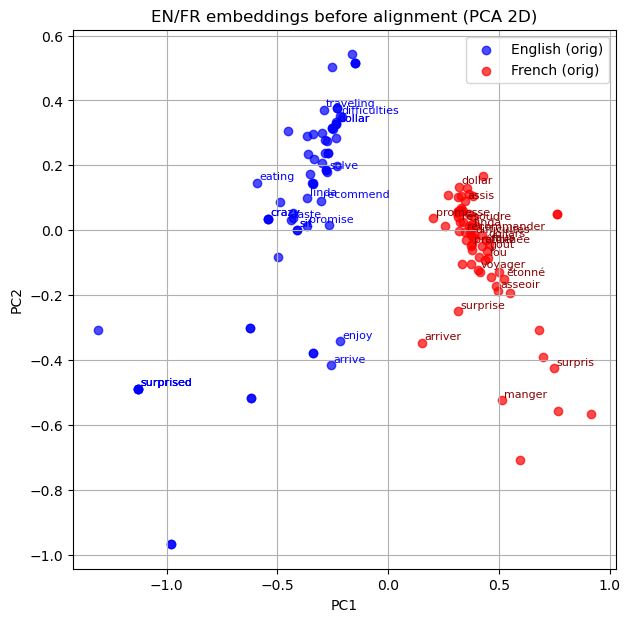

In [61]:

X_en_orig = np.vstack([en_w2v.wv[en_w] for en_w, fr_w in plot_pairs])
X_fr_orig = np.vstack([fr_w2v.wv[fr_w] for en_w, fr_w in plot_pairs])


X_all_orig = np.vstack([X_en_orig, X_fr_orig])

pca_orig = PCA(n_components=2)
X_all_orig_2d = pca_orig.fit_transform(X_all_orig)


n = len(plot_pairs)
X_en_orig_2d = X_all_orig_2d[:n]
X_fr_orig_2d = X_all_orig_2d[n:]

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))


plt.scatter(X_en_orig_2d[:, 0], X_en_orig_2d[:, 1],
            c="blue", alpha=0.7, label="English (orig)")


plt.scatter(X_fr_orig_2d[:, 0], X_fr_orig_2d[:, 1],
            c="red", alpha=0.7, label="French (orig)")


for i, (en_w, fr_w) in enumerate(plot_pairs[:20]):
    x_en, y_en = X_en_orig_2d[i]
    x_fr, y_fr = X_fr_orig_2d[i]
    plt.text(x_en + 0.01, y_en + 0.01, en_w, fontsize=8, color="blue")
    plt.text(x_fr + 0.01, y_fr + 0.01, fr_w, fontsize=8, color="darkred")

plt.title("EN/FR embeddings before alignment (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()



### AFTER Alignment

In [62]:

X_en_aligned = X_en_orig @ W      # shape (n, d)
X_all_aligned = np.vstack([X_en_aligned, X_fr_orig])

pca_aligned = PCA(n_components=2)
X_all_aligned_2d = pca_aligned.fit_transform(X_all_aligned)

X_en_aligned_2d = X_all_aligned_2d[:n]
X_fr_aligned_2d = X_all_aligned_2d[n:]


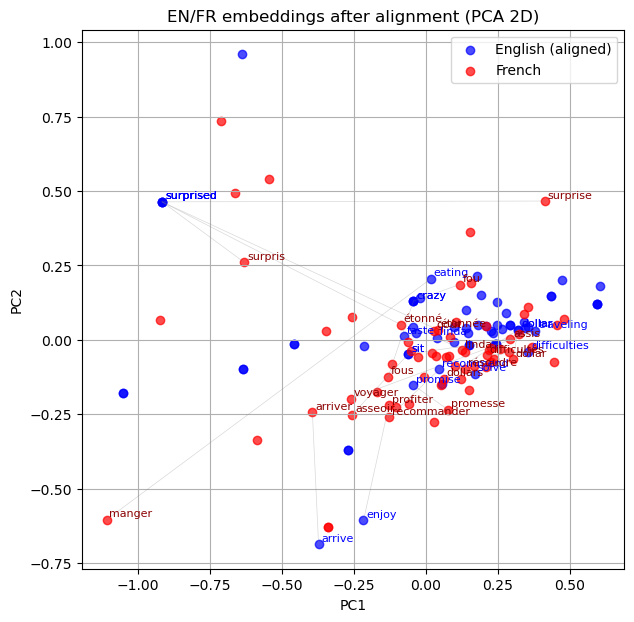

In [63]:
plt.figure(figsize=(7, 7))


plt.scatter(X_en_aligned_2d[:, 0], X_en_aligned_2d[:, 1],
            c="blue", alpha=0.7, label="English (aligned)")


plt.scatter(X_fr_aligned_2d[:, 0], X_fr_aligned_2d[:, 1],
            c="red", alpha=0.7, label="French")


for i, (en_w, fr_w) in enumerate(plot_pairs[:20]):
    x_en, y_en = X_en_aligned_2d[i]
    x_fr, y_fr = X_fr_aligned_2d[i]
    plt.text(x_en + 0.01, y_en + 0.01, en_w, fontsize=8, color="blue")
    plt.text(x_fr + 0.01, y_fr + 0.01, fr_w, fontsize=8, color="darkred")
    
    plt.plot([x_en, x_fr], [y_en, y_fr], c="gray", alpha=0.3, linewidth=0.5)

plt.title("EN/FR embeddings after alignment (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


### Synonyms / antonyms

In [68]:
from numpy.linalg import norm

def cos_sim(a, b):
    if norm(a) == 0 or norm(b) == 0:
        return 0.0
    return float(a @ b / (norm(a) * norm(b)))


en_synonyms = [
    ("big", "large"),
    ("small", "little"),
    ("fast", "quick"),
    ("happy", "glad"),
]

en_antonyms = [
    ("big", "small"),
    ("good", "bad"),
    ("hot", "cold"),
    ("happy", "sad"),
]


fr_synonyms = [
    ("grand", "gros"),
    ("petit", "minuscule"),
    ("rapide", "vite"),
    ("heureux", "content"),
]

fr_antonyms = [
    ("grand", "petit"),
    ("bon", "mauvais"),
    ("chaud", "froid"),
    ("heureux", "triste"),
]


In [70]:

def get_vec_en_w2v(w):
    return en_w2v.wv[w] if w in en_w2v.wv else None

def get_vec_fr_w2v(w):
    return fr_w2v.wv[w] if w in fr_w2v.wv else None


def get_vec_en_glove(w):
    return glove_en[w] if w in glove_en else None

# FastText gensim EN
def get_vec_en_ft(w):
    # gensim FastText has .wv for known words; for others you can still get a vector
    if w in ft_en.wv:
        return ft_en.wv[w]
    else:
        # FastText can build vectors from subwords even for rare words
        return ft_en.wv.get_vector(w)
def print_similarities(pairs, get_vec_fn, model_name):
    print(f"\n=== {model_name} ===")
    for w1, w2 in pairs:
        v1 = get_vec_fn(w1)
        v2 = get_vec_fn(w2)
        if v1 is None or v2 is None:
            print(f"{w1:10s} - {w2:10s}: OOV")
        else:
            sim = cos_sim(v1, v2)
            print(f"{w1:10s} - {w2:10s}: {sim:.3f}")

In [71]:

print("English synonyms:")
print_similarities(en_synonyms, get_vec_en_w2v, "Word2Vec EN")
print_similarities(en_synonyms, get_vec_en_glove, "GloVe EN")
print_similarities(en_synonyms, get_vec_en_ft,   "FastText EN")

print("\nEnglish antonyms:")
print_similarities(en_antonyms, get_vec_en_w2v, "Word2Vec EN")
print_similarities(en_antonyms, get_vec_en_glove, "GloVe EN")
print_similarities(en_antonyms, get_vec_en_ft,   "FastText EN")


print("\nFrench synonyms (Word2Vec FR):")
print_similarities(fr_synonyms, get_vec_fr_w2v, "Word2Vec FR")

print("\nFrench antonyms (Word2Vec FR):")
print_similarities(fr_antonyms, get_vec_fr_w2v, "Word2Vec FR")


English synonyms:

=== Word2Vec EN ===
big        - large     : 0.939
small      - little    : 0.570
fast       - quick     : 0.891
happy      - glad      : 0.707

=== GloVe EN ===
big        - large     : 0.708
small      - little    : 0.730
fast       - quick     : 0.711
happy      - glad      : 0.783

=== FastText EN ===
big        - large     : 1.000
small      - little    : 1.000
fast       - quick     : 1.000
happy      - glad      : 1.000

English antonyms:

=== Word2Vec EN ===
big        - small     : 0.948
good       - bad       : 0.579
hot        - cold      : 0.852
happy      - sad       : 0.793

=== GloVe EN ===
big        - small     : 0.718
good       - bad       : 0.770
hot        - cold      : 0.725
happy      - sad       : 0.680

=== FastText EN ===
big        - small     : 0.999
good       - bad       : 1.000
hot        - cold      : 1.000
happy      - sad       : 1.000

French synonyms (Word2Vec FR):

=== Word2Vec FR ===
grand      - gros      : 0.730
petit      - mi

### Word pairs between languages

In [72]:
translation_pairs = [
    ("hello", "bonjour"),
    ("goodbye", "au revoir"),
    ("thanks", "merci"),
    ("family", "famille"),
    ("world", "monde"),
]

print("\nCross-lingual similarities after alignment (Word2Vec + W):")
for en_w, fr_w in translation_pairs:
    if en_w in en_w2v.wv and fr_w in fr_w2v.wv:
        en_vec = en_w2v.wv[en_w] @ W
        fr_vec = fr_w2v.wv[fr_w]
        sim = cos_sim(en_vec, fr_vec)
        print(f"{en_w:10s} - {fr_w:10s}: {sim:.3f}")
    else:
        print(f"{en_w:10s} - {fr_w:10s}: OOV")



Cross-lingual similarities after alignment (Word2Vec + W):
hello      - bonjour   : 0.886
goodbye    - au revoir : OOV
thanks     - merci     : 0.898
family     - famille   : 0.851
world      - monde     : 0.826


### Polysemy

In [78]:
def show_neighbors(word, model, topn=15):
    if word not in model.wv:
        print(f"{word} is OOV.")
        return
    print(f"\nTop {topn} neighbors of '{word}':")
    for w, score in model.wv.most_similar(word, topn=topn):
        print(f"{w:15s} {score:.3f}")

show_neighbors("bank", en_w2v, topn=15)



Top 15 neighbors of 'bank':
refrain         0.949
button          0.947
nearest         0.945
river           0.943
bottom          0.941
tourist         0.941
middle          0.940
sum             0.940
forest          0.940
push            0.939
indicate        0.938
hotel           0.937
hat             0.937
coming          0.936
prevented       0.935


### OOV and rare words

In [79]:
test_words = [
    "today", "birthday",          # common
    "xylophone",                  # rare
    "colour", "color",            # variants
    "tooday",                     # typo
    "enfants", "enfant",          # French inflection
]

def coverage_report(words, models_dict):
    """
    models_dict: name -> callable(word) that returns a vector or None if OOV.
    """
    for name, get_vec in models_dict.items():
        covered = 0
        for w in words:
            v = get_vec(w)
            if v is not None:
                covered += 1
        print(f"{name:15s}: {covered}/{len(words)} words covered")


def vec_w2v_en(w):
    return en_w2v.wv[w] if w in en_w2v.wv else None

def vec_glove_en(w):
    return glove_en[w] if w in glove_en else None

def vec_ft_en(w):
    try:
        return ft_en.wv[w] if w in ft_en.wv else None
    except:
        return None

models_en = {
    "Word2Vec EN": vec_w2v_en,
    "GloVe EN":    vec_glove_en,
    "FastText EN": vec_ft_en,   # ici FastText gensim
}

coverage_report(test_words, models_en)


Word2Vec EN    : 3/8 words covered
GloVe EN       : 7/8 words covered
FastText EN    : 8/8 words covered


In [80]:
def in_vocab_tfidf(word, vectorizer):
    return word in vectorizer.vocabulary_

print("TF-IDF EN coverage:")
for w in test_words:
    print(w, "->", in_vocab_tfidf(w, en_tfidf_vectorizer))


TF-IDF EN coverage:
today -> True
birthday -> True
xylophone -> False
colour -> False
color -> True
tooday -> False
enfants -> False
enfant -> False


# Step 04 :language Identification EN/FR

### Build the classification dataset

In [81]:


en_texts = [" ".join(tokens) for tokens in df["en_tokens"]]
fr_texts = [" ".join(tokens) for tokens in df["fr_tokens"]]

data_clf = pd.DataFrame({
    "text": en_texts + fr_texts,
    "lang": ["en"] * len(en_texts) + ["fr"] * len(fr_texts)
})


data_clf = data_clf.sample(frac=1.0, random_state=42).reset_index(drop=True)

print(data_clf.head())
print(data_clf["lang"].value_counts())


                                                text lang
0  quand je demande aux gens ce qu ils regrettent...   fr
1                  you should have been more careful   en
2              do you know of any inexpensive stores   en
3                            cut wash and dry please   en
4                          merci d aller à la banque   fr
lang
fr    10000
en    10000
Name: count, dtype: int64


In [82]:
from sklearn.model_selection import train_test_split

X_text = data_clf["text"].values
y = data_clf["lang"].values

# 70% train, 30% temp
X_train_text, X_temp_text, y_train, y_temp = train_test_split(
    X_text, y, test_size=0.30, random_state=42, stratify=y
)

# 15% val, 15% test
X_val_text, X_test_text, y_val, y_test = train_test_split(
    X_temp_text, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print(len(X_train_text), len(X_val_text), len(X_test_text))


14000 3000 3000


### Representation of sentences

#### TF‑IDF

In [83]:

tfidf_vec = TfidfVectorizer(
    lowercase=False,  
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 1)
)

X_train_tfidf = tfidf_vec.fit_transform(X_train_text)
X_val_tfidf   = tfidf_vec.transform(X_val_text)
X_test_tfidf  = tfidf_vec.transform(X_test_text)

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)


TF-IDF shapes: (14000, 5483) (3000, 5483) (3000, 5483)


#### Word2Vec

In [84]:
def sentence_embedding_w2v_sentence(text, en_model, fr_model):
    """
    Build a sentence embedding by averaging word vectors.
    Detect language by simple heuristic: presence of accented characters
    or a flag you may provide. For simplicity, we treat it as English if not French.
    """
    tokens = text.split()
    vecs = []
    for w in tokens:
        if w in en_model.wv:
            vecs.append(en_model.wv[w])
        elif w in fr_model.wv:
            vecs.append(fr_model.wv[w])
    if not vecs:
        return np.zeros(en_model.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

def build_w2v_features(text_list, en_model, fr_model):
    return np.vstack([
        sentence_embedding_w2v_sentence(text, en_model, fr_model)
        for text in text_list
    ])

X_train_w2v = build_w2v_features(X_train_text, en_w2v, fr_w2v)
X_val_w2v   = build_w2v_features(X_val_text,   en_w2v, fr_w2v)
X_test_w2v  = build_w2v_features(X_test_text,  en_w2v, fr_w2v)

print("W2V shapes:", X_train_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)


W2V shapes: (14000, 100) (3000, 100) (3000, 100)


#### FastText

In [89]:
def sent_embedding_fasttext(text, ft_en_model, ft_fr_model):
    """
    Average FastText embeddings over tokens.
    We try EN then FR for each token.
    """
    tokens = text.split()
    vecs = []
    for w in tokens:
        if w in ft_en_model.wv:
            vecs.append(ft_en_model.wv[w])
        elif w in ft_fr_model.wv:
            vecs.append(ft_fr_model.wv[w])
        else:
            # fallback: subword vector from EN model
            vecs.append(ft_en_model.wv.get_vector(w))
    if not vecs:
        return np.zeros(ft_en_model.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

def build_ft_features(text_list, ft_en_model, ft_fr_model):
    return np.vstack([sent_embedding_fasttext(t, ft_en_model, ft_fr_model)
                      for t in text_list])

X_train_ft = build_ft_features(X_train_text, ft_en, ft_fr)
X_val_ft   = build_ft_features(X_val_text,   ft_en, ft_fr)
X_test_ft  = build_ft_features(X_test_text,  ft_en, ft_fr)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler_w2v = StandardScaler()
X_train_w2v_scaled = scaler_w2v.fit_transform(X_train_w2v)
X_val_w2v_scaled   = scaler_w2v.transform(X_val_w2v)
X_test_w2v_scaled  = scaler_w2v.transform(X_test_w2v)

In [91]:

scaler_ft = StandardScaler()
X_train_ft_scaled = scaler_ft.fit_transform(X_train_ft)
X_val_ft_scaled   = scaler_ft.transform(X_val_ft)
X_test_ft_scaled  = scaler_ft.transform(X_test_ft)


### Classification model (Logistic Regression)

#### TF‑IDF + LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_tfidf = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1
)

clf_tfidf.fit(X_train_tfidf, y_train)

print("Validation (TF-IDF):")
y_val_pred_tfidf = clf_tfidf.predict(X_val_tfidf)
print(classification_report(y_val, y_val_pred_tfidf))

print("Test (TF-IDF):")
y_test_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
print(classification_report(y_test, y_test_pred_tfidf))


Validation (TF-IDF):
              precision    recall  f1-score   support

          en       1.00      1.00      1.00      1500
          fr       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Test (TF-IDF):
              precision    recall  f1-score   support

          en       1.00      1.00      1.00      1500
          fr       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



#### Word2Vec + LogisticRegression

In [95]:
clf_w2v = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1
)
clf_w2v.fit(X_train_w2v_scaled, y_train)

print("Validation (Word2Vec, scaled):")
y_val_pred_w2v = clf_w2v.predict(X_val_w2v_scaled)
print(classification_report(y_val, y_val_pred_w2v))

print("Test (Word2Vec, scaled):")
y_test_pred_w2v = clf_w2v.predict(X_test_w2v_scaled)
print(classification_report(y_test, y_test_pred_w2v))

Validation (Word2Vec, scaled):
              precision    recall  f1-score   support

          en       1.00      1.00      1.00      1500
          fr       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Test (Word2Vec, scaled):
              precision    recall  f1-score   support

          en       1.00      1.00      1.00      1500
          fr       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_ft = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1
)

clf_ft.fit(X_train_ft_scaled, y_train)

print("Validation (FastText, scaled):")
y_val_pred_ft = clf_ft.predict(X_val_ft_scaled)
print(classification_report(y_val, y_val_pred_ft))

print("Test (FastText, scaled):")
y_test_pred_ft = clf_ft.predict(X_test_ft_scaled)
print(classification_report(y_test, y_test_pred_ft))


Validation (FastText, scaled):
              precision    recall  f1-score   support

          en       0.96      0.96      0.96      1500
          fr       0.96      0.96      0.96      1500

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Test (FastText, scaled):
              precision    recall  f1-score   support

          en       0.96      0.95      0.96      1500
          fr       0.95      0.96      0.96      1500

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [93]:
from sklearn.svm import LinearSVC

svm_ft = LinearSVC()
svm_ft.fit(X_train_ft_scaled, y_train)

print("Test (FastText + LinearSVC):")
y_test_pred_svm = svm_ft.predict(X_test_ft_scaled)
print(classification_report(y_test, y_test_pred_svm))


Test (FastText + LinearSVC):
              precision    recall  f1-score   support

          en       0.98      0.97      0.97      1500
          fr       0.97      0.98      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

